Loading data for llama-3.2-3b-instruct-reverse...
  Found 3 personas, 5 seeds, 7 k-shot values

Loading data for llama-3.2-3b-instruct-debiased...
  Found 3 personas, 5 seeds, 7 k-shot values

Plotting 3 persona(s)


Processing Persona 1: 309fa18d...

  Statistics for llama-3.2-3b-instruct-reverse:
  K-shot 0: Mean = 62.70%, Std = 0.00%, n = 5
  K-shot 1: Mean = 64.88%, Std = 0.42%, n = 5
  K-shot 2: Mean = 65.23%, Std = 0.59%, n = 5
  K-shot 3: Mean = 66.29%, Std = 1.27%, n = 5
  K-shot 4: Mean = 65.94%, Std = 1.03%, n = 5
  K-shot 8: Mean = 66.45%, Std = 0.79%, n = 5
  K-shot 16: Mean = 65.51%, Std = 0.81%, n = 5

  Statistics for llama-3.2-3b-instruct-debiased:
  K-shot 0: Mean = 62.70%, Std = 0.00%, n = 5
  K-shot 1: Mean = 64.41%, Std = 0.43%, n = 5
  K-shot 2: Mean = 66.68%, Std = 0.46%, n = 5
  K-shot 3: Mean = 66.56%, Std = 1.21%, n = 5
  K-shot 4: Mean = 66.80%, Std = 0.85%, n = 5
  K-shot 8: Mean = 66.68%, Std = 0.97%, n = 5
  K-shot 16: Mean = 65.59%, Std = 1.52%, n = 5

  F

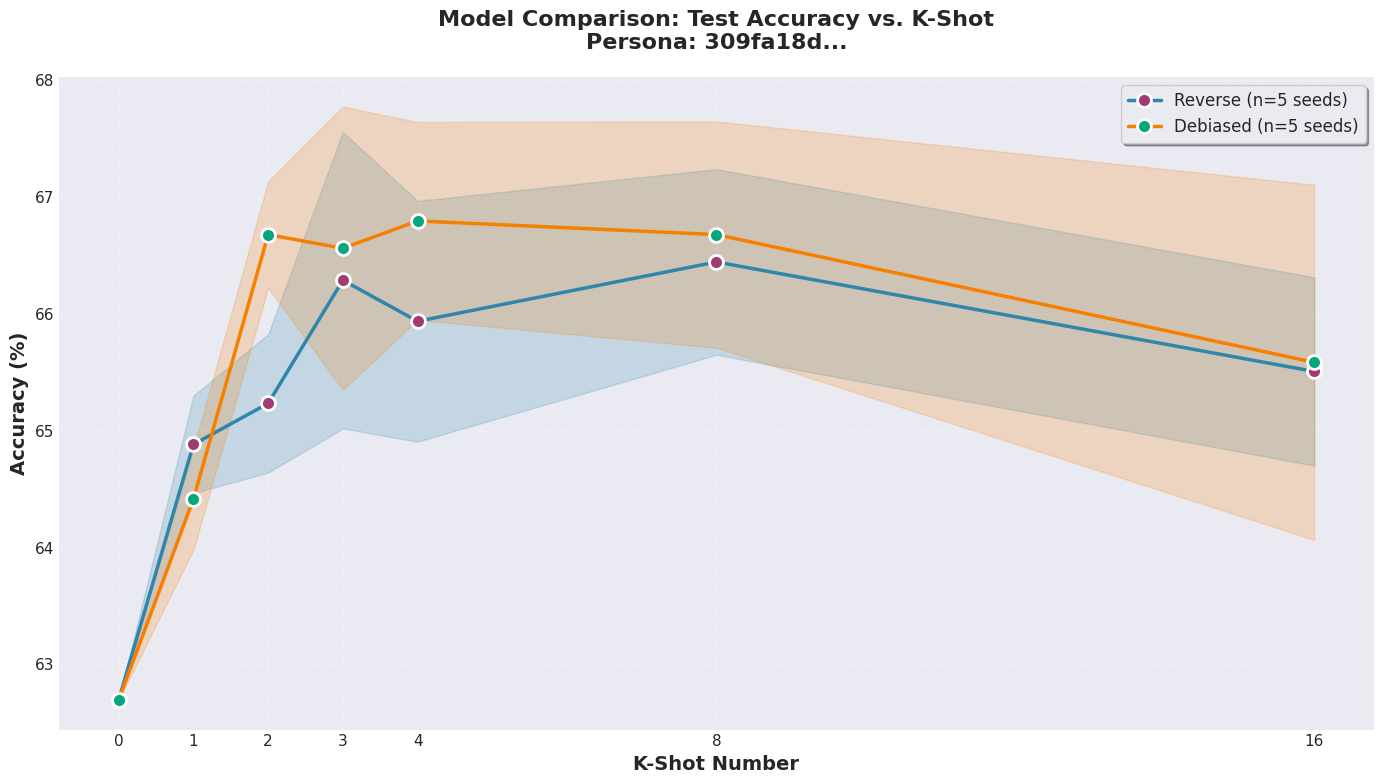


Processing Persona 2: 7340e022...

  Statistics for llama-3.2-3b-instruct-reverse:
  K-shot 0: Mean = 66.80%, Std = 0.00%, n = 5
  K-shot 1: Mean = 68.28%, Std = 1.15%, n = 5
  K-shot 2: Mean = 69.38%, Std = 0.62%, n = 5
  K-shot 3: Mean = 69.10%, Std = 0.82%, n = 5
  K-shot 4: Mean = 68.40%, Std = 0.81%, n = 5
  K-shot 8: Mean = 68.59%, Std = 0.56%, n = 5
  K-shot 16: Mean = 66.88%, Std = 0.47%, n = 5

  Statistics for llama-3.2-3b-instruct-debiased:
  K-shot 0: Mean = 66.80%, Std = 0.00%, n = 5
  K-shot 1: Mean = 68.83%, Std = 1.43%, n = 5
  K-shot 2: Mean = 69.34%, Std = 0.75%, n = 5
  K-shot 3: Mean = 69.57%, Std = 0.48%, n = 5
  K-shot 4: Mean = 69.14%, Std = 0.68%, n = 5
  K-shot 8: Mean = 68.79%, Std = 0.80%, n = 5
  K-shot 16: Mean = 67.50%, Std = 0.50%, n = 5

  Figure saved to: comparison_kshot_accuracy_persona_7340e022.png
  Figure saved to: comparison_kshot_accuracy_persona_7340e022.pdf


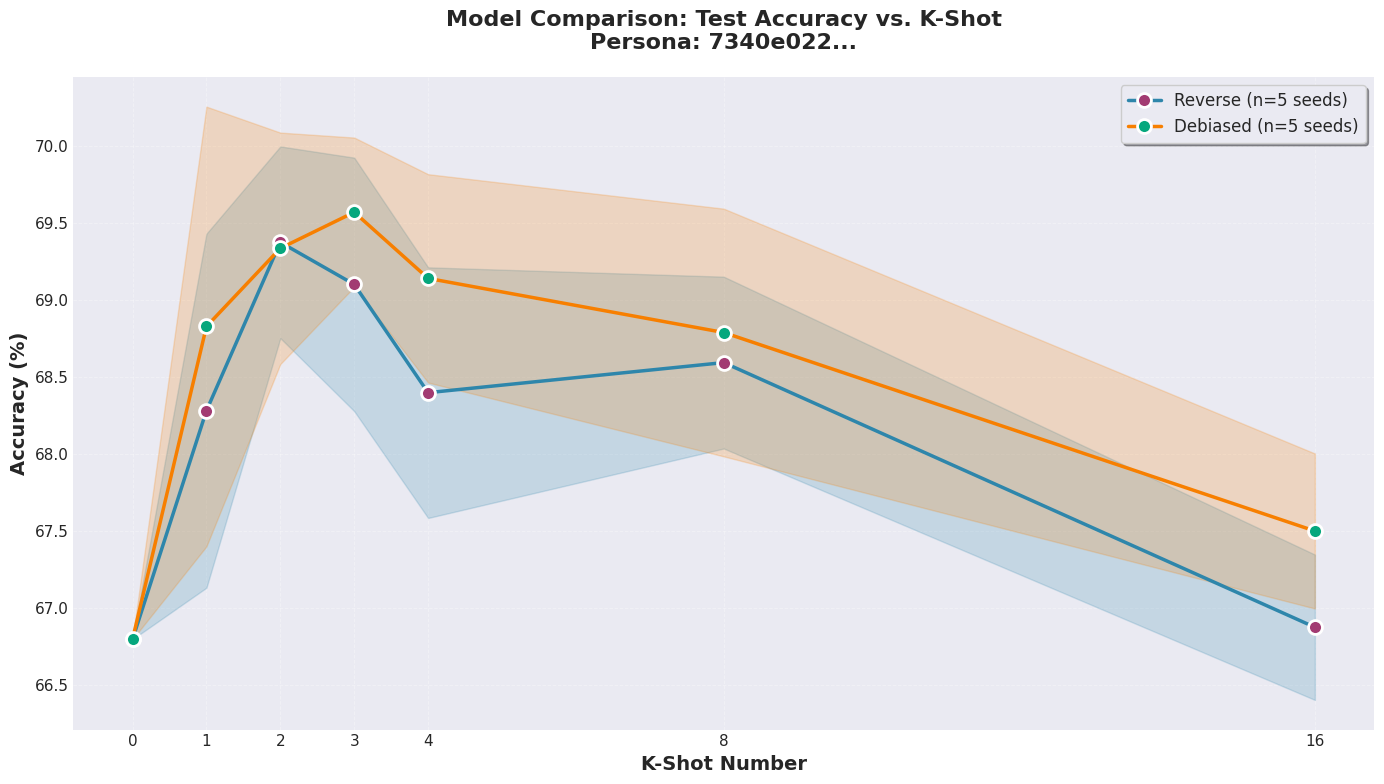


Processing Persona 3: cdf7cefb...

  Statistics for llama-3.2-3b-instruct-reverse:
  K-shot 0: Mean = 66.02%, Std = 0.00%, n = 5
  K-shot 1: Mean = 68.67%, Std = 0.93%, n = 5
  K-shot 2: Mean = 68.52%, Std = 1.20%, n = 5
  K-shot 3: Mean = 68.16%, Std = 0.88%, n = 5
  K-shot 4: Mean = 67.62%, Std = 0.83%, n = 5
  K-shot 8: Mean = 66.25%, Std = 0.89%, n = 5
  K-shot 16: Mean = 64.65%, Std = 0.65%, n = 5

  Statistics for llama-3.2-3b-instruct-debiased:
  K-shot 0: Mean = 66.02%, Std = 0.00%, n = 5
  K-shot 1: Mean = 67.85%, Std = 1.44%, n = 5
  K-shot 2: Mean = 67.66%, Std = 1.43%, n = 5
  K-shot 3: Mean = 67.81%, Std = 1.18%, n = 5
  K-shot 4: Mean = 67.46%, Std = 1.06%, n = 5
  K-shot 8: Mean = 66.25%, Std = 0.52%, n = 5
  K-shot 16: Mean = 64.77%, Std = 0.73%, n = 5

  Figure saved to: comparison_kshot_accuracy_persona_cdf7cefb.png
  Figure saved to: comparison_kshot_accuracy_persona_cdf7cefb.pdf


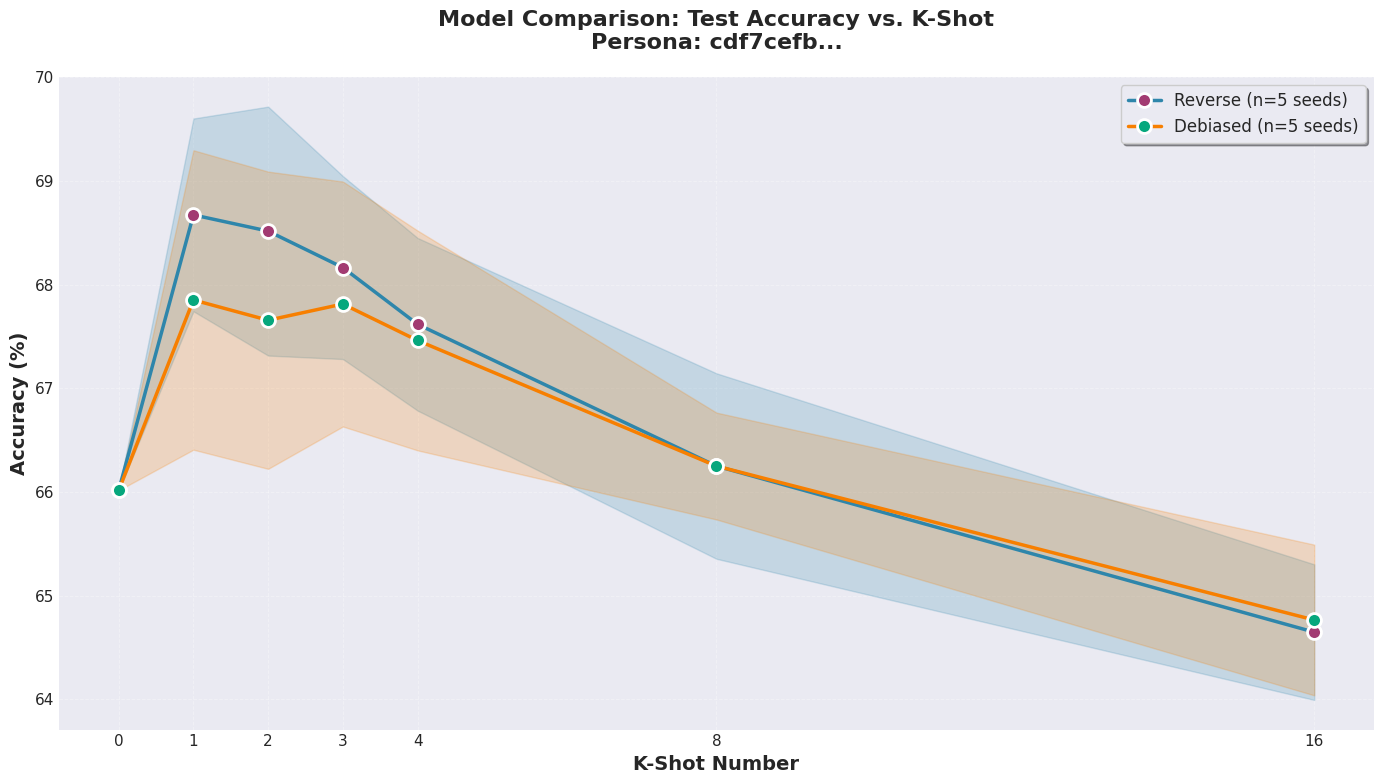


All comparison plots generated successfully!


In [1]:
#!/usr/bin/env python3
"""
Visualization script for k-shot accuracy analysis across multiple personas and seeds.
Compares two models: llama-3.2-3b-instruct-reverse and llama-3.2-3b-instruct-debiased.
"""

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import glob
from collections import defaultdict
import os

# Set the style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')

# Configure matplotlib for better aesthetics
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18

# Define the two models to compare
models = {
    'llama-3.2-3b-instruct-reverse': {
        'path': 'persona_results/llama-3.2-3b-instruct-reverse/',
        'color': '#2E86AB',  # Blue
        'marker_color': '#A23B72',  # Purple-pink
        'label': 'Reverse'
    },
    'llama-3.2-3b-instruct-debiased': {
        'path': 'persona_results/llama-3.2-3b-instruct-debiased/',
        'color': '#F77F00',  # Orange
        'marker_color': '#06A77D',  # Green
        'label': 'Debiased'
    }
}

def load_model_data(results_folder):
    """Load data for a single model."""
    # Load all metadata JSON files (excluding files ending with _2.json)
    metadata_files = [f for f in glob.glob(os.path.join(results_folder, 'metadata_seed_*_k*_persona*.json'))
                      if not f.endswith('_2.json')]
    
    # Organize data: persona_data[persona_id][seed][k_shot] = accuracy
    persona_data = defaultdict(lambda: defaultdict(dict))
    all_personas = set()
    all_seeds = set()
    all_k_shots = set()
    
    # Parse all JSON files
    for filepath in metadata_files:
        with open(filepath, 'r') as f:
            data = json.load(f)
        
        seed = data['seed']
        k_shot = data['k_shot']
        accuracy = data['accuracy_metrics']['accuracy'] * 100  # Convert to percentage
        
        # Extract persona_id from filename
        filename = os.path.basename(filepath)
        if 'persona_' in filename and filename.count('persona_') > 1:
            # Has explicit persona ID
            persona_id = filename.split('persona_')[1].replace('.json', '')
        else:
            # No explicit persona ID - use 'default'
            persona_id = data.get('persona_id', 'default')
        
        persona_data[persona_id][seed][k_shot] = accuracy
        all_personas.add(persona_id)
        all_seeds.add(seed)
        all_k_shots.add(k_shot)
    
    return persona_data, sorted(all_personas), sorted(all_seeds), sorted(all_k_shots)

# Load data for both models
model_data = {}
for model_name, model_info in models.items():
    print(f"Loading data for {model_name}...")
    persona_data, personas, seeds, k_shots = load_model_data(model_info['path'])
    model_data[model_name] = {
        'persona_data': persona_data,
        'personas': personas,
        'seeds': seeds,
        'k_shots': k_shots
    }
    print(f"  Found {len(personas)} personas, {len(seeds)} seeds, {len(k_shots)} k-shot values")
    print()

# Get common personas across both models
common_personas = sorted(set(model_data['llama-3.2-3b-instruct-reverse']['personas']) & 
                        set(model_data['llama-3.2-3b-instruct-debiased']['personas']))

if not common_personas:
    print("Warning: No common personas found between the two models!")
    # Use all personas from both models
    all_personas = sorted(set(model_data['llama-3.2-3b-instruct-reverse']['personas']) | 
                         set(model_data['llama-3.2-3b-instruct-debiased']['personas']))
else:
    all_personas = common_personas

print(f"Plotting {len(all_personas)} persona(s)")
print()

# Create one figure per persona comparing both models
for persona_idx, persona_id in enumerate(all_personas):
    print(f"\nProcessing Persona {persona_idx + 1}: {persona_id[:8]}...")
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot data for each model
    for model_name, model_info in models.items():
        data = model_data[model_name]
        
        # Check if this persona exists in this model
        if persona_id not in data['persona_data']:
            print(f"  Persona {persona_id[:8]} not found in {model_name}")
            continue
        
        all_seeds = data['seeds']
        all_k_shots = data['k_shots']
        persona_data = data['persona_data']
        
        # Organize data for this persona: shape (num_seeds, num_k_shots)
        accuracy_matrix = []
        
        for seed in all_seeds:
            seed_accuracies = []
            for k_shot in all_k_shots:
                acc = persona_data[persona_id][seed].get(k_shot, np.nan)
                seed_accuracies.append(acc)
            accuracy_matrix.append(seed_accuracies)
        
        accuracy_matrix = np.array(accuracy_matrix)
        
        # Calculate mean and std across seeds (axis=0)
        mean_accuracy = np.nanmean(accuracy_matrix, axis=0)
        std_accuracy = np.nanstd(accuracy_matrix, axis=0)
        
        # Count valid data points for each k-shot
        valid_counts = np.sum(~np.isnan(accuracy_matrix), axis=0)
        
        # Plot mean with markers
        ax.plot(all_k_shots, mean_accuracy, marker='o', linewidth=2.5, markersize=10,
                color=model_info['color'], markerfacecolor=model_info['marker_color'], 
                markeredgewidth=2, markeredgecolor='white', 
                label=f"{model_info['label']} (n={len(all_seeds)} seeds)", zorder=3)
        
        # Add shaded region for ±1 standard deviation
        ax.fill_between(all_k_shots, 
                        mean_accuracy - std_accuracy, 
                        mean_accuracy + std_accuracy,
                        alpha=0.2, color=model_info['color'], zorder=1)
        
        # Print statistics
        print(f"\n  Statistics for {model_name}:")
        print("  " + "="*50)
        for i, k in enumerate(all_k_shots):
            if not np.isnan(mean_accuracy[i]):
                print(f"  K-shot {k}: Mean = {mean_accuracy[i]:.2f}%, Std = {std_accuracy[i]:.2f}%, n = {int(valid_counts[i])}")
            else:
                print(f"  K-shot {k}: No data available")
    
    # Customize the plot
    ax.set_xlabel('K-Shot Number', fontweight='bold', fontsize=14)
    ax.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=14)
    ax.set_title(f'Model Comparison: Test Accuracy vs. K-Shot\nPersona: {persona_id[:8]}...', 
                 fontweight='bold', fontsize=16, pad=20)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
    ax.set_axisbelow(True)
    
    # Customize ticks - use k_shots from the first model (should be the same)
    all_k_shots = model_data['llama-3.2-3b-instruct-reverse']['k_shots']
    ax.set_xticks(all_k_shots)
    ax.set_xticklabels([str(k) for k in all_k_shots])
    
    # Set y-axis limits
    # ax.set_ylim(0, 100)
    
    # Add legend
    ax.legend(loc='best', frameon=True, shadow=True, fancybox=True)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    # Save the figure
    persona_short = persona_id[:8] if len(persona_id) > 8 else persona_id
    output_path = f'comparison_kshot_accuracy_persona_{persona_short}.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"\n  Figure saved to: {output_path}")
    
    # Save as PDF as well
    output_path_pdf = f'comparison_kshot_accuracy_persona_{persona_short}.pdf'
    plt.savefig(output_path_pdf, bbox_inches='tight', facecolor='white')
    print(f"  Figure saved to: {output_path_pdf}")
    
    # Display the plot
    plt.show()

print("\n" + "="*60)
print("All comparison plots generated successfully!")
print("="*60)

Loading data for llama-3.1-8b-instruct-reverse...
  Found 3 personas, 5 seeds, 7 k-shot values

Loading data for llama-3.1-8b-instruct-debiased...
  Found 3 personas, 5 seeds, 7 k-shot values

Plotting 3 persona(s)


Processing Persona 1: 309fa18d...

  Statistics for llama-3.1-8b-instruct-reverse:
  K-shot 0: Mean = 66.02%, Std = 0.00%, n = 5
  K-shot 1: Mean = 63.67%, Std = 1.05%, n = 5
  K-shot 2: Mean = 63.48%, Std = 0.67%, n = 5
  K-shot 3: Mean = 64.38%, Std = 0.92%, n = 5
  K-shot 4: Mean = 64.80%, Std = 0.66%, n = 5
  K-shot 8: Mean = 63.95%, Std = 1.02%, n = 5
  K-shot 16: Mean = 63.05%, Std = 1.04%, n = 5

  Statistics for llama-3.1-8b-instruct-debiased:
  K-shot 0: Mean = 66.02%, Std = 0.00%, n = 5
  K-shot 1: Mean = 63.91%, Std = 0.52%, n = 5
  K-shot 2: Mean = 63.98%, Std = 0.40%, n = 5
  K-shot 3: Mean = 64.73%, Std = 0.52%, n = 5
  K-shot 4: Mean = 64.96%, Std = 1.08%, n = 5
  K-shot 8: Mean = 64.10%, Std = 0.38%, n = 5
  K-shot 16: Mean = 64.14%, Std = 0.71%, n = 5

  F

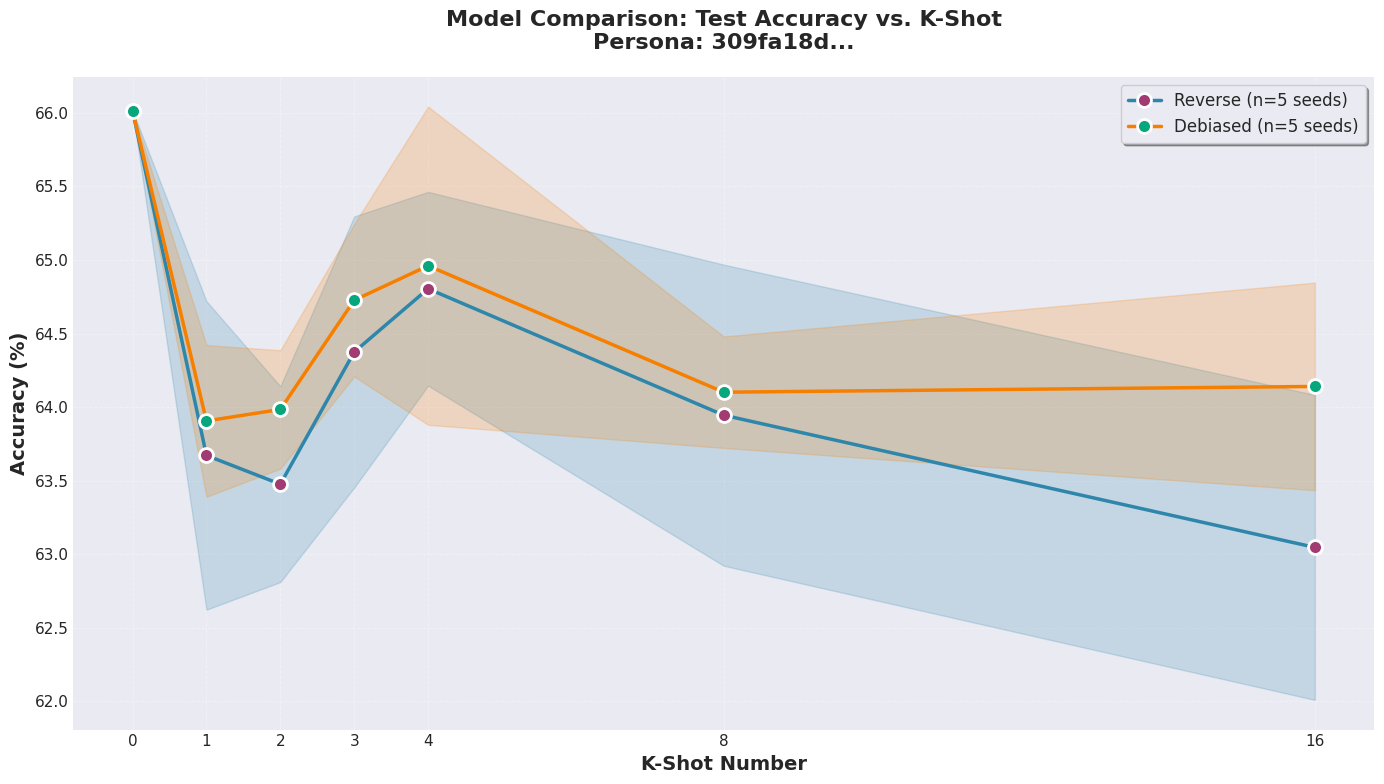


Processing Persona 2: 7340e022...

  Statistics for llama-3.1-8b-instruct-reverse:
  K-shot 0: Mean = 69.14%, Std = 0.00%, n = 5
  K-shot 1: Mean = 67.27%, Std = 0.86%, n = 5
  K-shot 2: Mean = 67.81%, Std = 0.57%, n = 5
  K-shot 3: Mean = 68.05%, Std = 0.38%, n = 5
  K-shot 4: Mean = 68.52%, Std = 0.45%, n = 5
  K-shot 8: Mean = 67.50%, Std = 0.40%, n = 5
  K-shot 16: Mean = 67.70%, Std = 1.02%, n = 5

  Statistics for llama-3.1-8b-instruct-debiased:
  K-shot 0: Mean = 69.14%, Std = 0.00%, n = 5
  K-shot 1: Mean = 68.01%, Std = 0.97%, n = 5
  K-shot 2: Mean = 68.12%, Std = 0.54%, n = 5
  K-shot 3: Mean = 68.98%, Std = 0.62%, n = 5
  K-shot 4: Mean = 68.32%, Std = 0.31%, n = 5
  K-shot 8: Mean = 68.20%, Std = 0.48%, n = 5
  K-shot 16: Mean = 68.52%, Std = 0.80%, n = 5

  Figure saved to: comparison_kshot_accuracy_persona_7340e022.png
  Figure saved to: comparison_kshot_accuracy_persona_7340e022.pdf


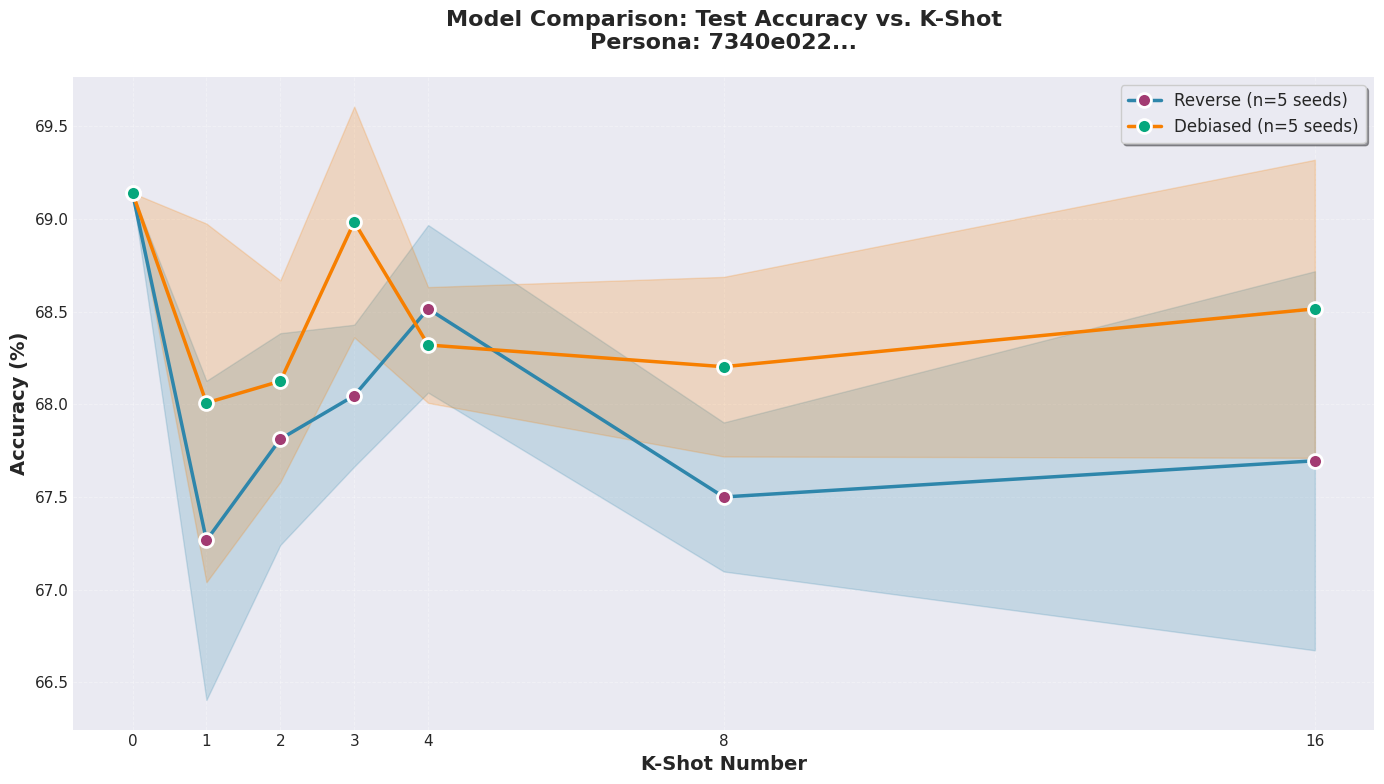


Processing Persona 3: cdf7cefb...

  Statistics for llama-3.1-8b-instruct-reverse:
  K-shot 0: Mean = 68.55%, Std = 0.00%, n = 5
  K-shot 1: Mean = 72.03%, Std = 0.65%, n = 5
  K-shot 2: Mean = 73.20%, Std = 0.99%, n = 5
  K-shot 3: Mean = 72.54%, Std = 0.88%, n = 5
  K-shot 4: Mean = 71.76%, Std = 0.72%, n = 5
  K-shot 8: Mean = 70.51%, Std = 0.52%, n = 5
  K-shot 16: Mean = 68.48%, Std = 0.72%, n = 5

  Statistics for llama-3.1-8b-instruct-debiased:
  K-shot 0: Mean = 68.55%, Std = 0.00%, n = 5
  K-shot 1: Mean = 72.30%, Std = 0.65%, n = 5
  K-shot 2: Mean = 73.05%, Std = 0.63%, n = 5
  K-shot 3: Mean = 73.20%, Std = 0.47%, n = 5
  K-shot 4: Mean = 72.19%, Std = 0.69%, n = 5
  K-shot 8: Mean = 71.45%, Std = 0.47%, n = 5
  K-shot 16: Mean = 70.22%, Std = 1.47%, n = 5

  Figure saved to: comparison_kshot_accuracy_persona_cdf7cefb.png
  Figure saved to: comparison_kshot_accuracy_persona_cdf7cefb.pdf


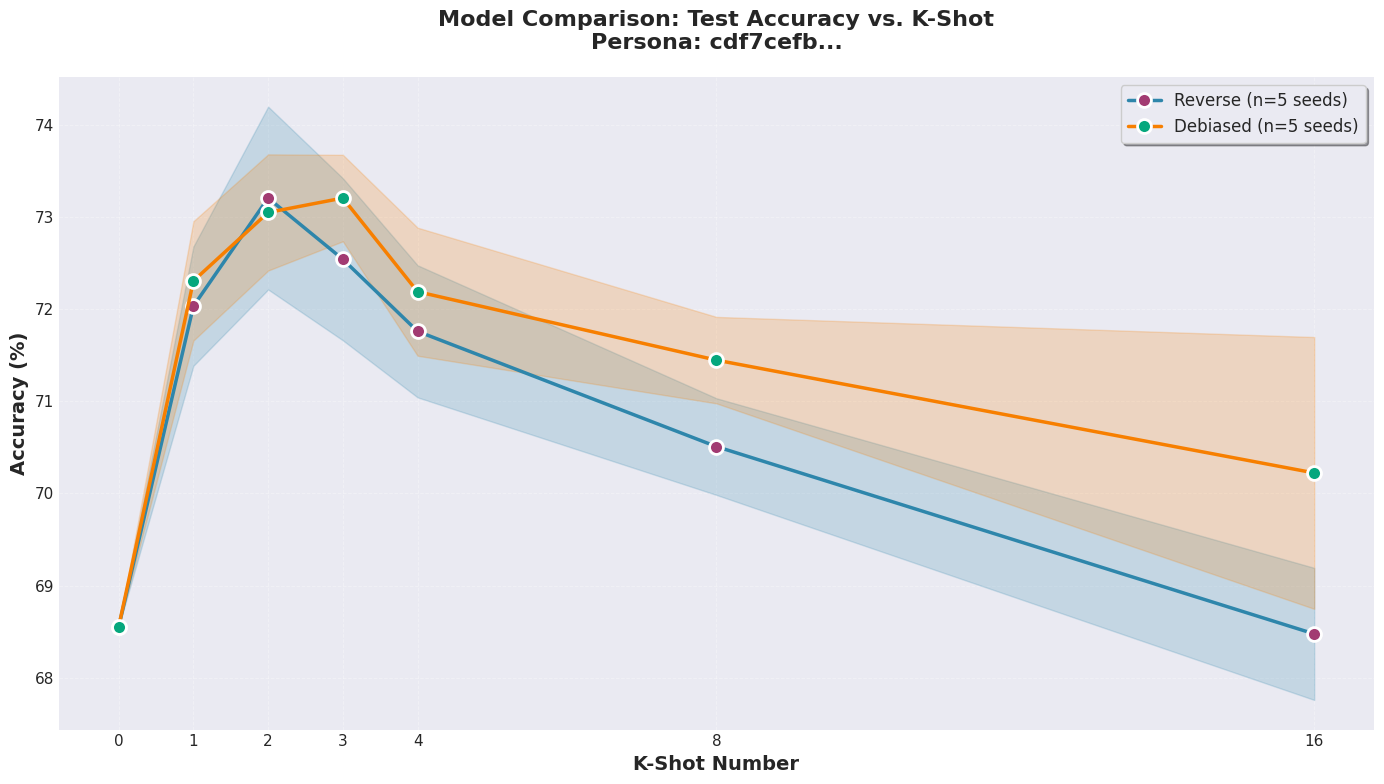


All comparison plots generated successfully!


In [2]:
#!/usr/bin/env python3
"""
Visualization script for k-shot accuracy analysis across multiple personas and seeds.
Compares two models: llama-3.2-3b-instruct-reverse and llama-3.2-3b-instruct-debiased.
"""

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import glob
from collections import defaultdict
import os

# Set the style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')

# Configure matplotlib for better aesthetics
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18

# Define the two models to compare
models = {
    'llama-3.1-8b-instruct-reverse': {
        'path': 'persona_results/llama-3.1-8b-instruct-reverse/',
        'color': '#2E86AB',  # Blue
        'marker_color': '#A23B72',  # Purple-pink
        'label': 'Reverse'
    },
    'llama-3.1-8b-instruct-debiased': {
        'path': 'persona_results/llama-3.1-8b-instruct-debiased/',
        'color': '#F77F00',  # Orange
        'marker_color': '#06A77D',  # Green
        'label': 'Debiased'
    }
}

def load_model_data(results_folder):
    """Load data for a single model."""
    # Load all metadata JSON files (excluding files ending with _2.json)
    metadata_files = [f for f in glob.glob(os.path.join(results_folder, 'metadata_seed_*_k*_persona*.json'))
                      if not f.endswith('_2.json')]
    
    # Organize data: persona_data[persona_id][seed][k_shot] = accuracy
    persona_data = defaultdict(lambda: defaultdict(dict))
    all_personas = set()
    all_seeds = set()
    all_k_shots = set()
    
    # Parse all JSON files
    for filepath in metadata_files:
        with open(filepath, 'r') as f:
            data = json.load(f)
        
        seed = data['seed']
        k_shot = data['k_shot']
        accuracy = data['accuracy_metrics']['accuracy'] * 100  # Convert to percentage
        
        # Extract persona_id from filename
        filename = os.path.basename(filepath)
        if 'persona_' in filename and filename.count('persona_') > 1:
            # Has explicit persona ID
            persona_id = filename.split('persona_')[1].replace('.json', '')
        else:
            # No explicit persona ID - use 'default'
            persona_id = data.get('persona_id', 'default')
        
        persona_data[persona_id][seed][k_shot] = accuracy
        all_personas.add(persona_id)
        all_seeds.add(seed)
        all_k_shots.add(k_shot)
    
    return persona_data, sorted(all_personas), sorted(all_seeds), sorted(all_k_shots)

# Load data for both models
model_data = {}
for model_name, model_info in models.items():
    print(f"Loading data for {model_name}...")
    persona_data, personas, seeds, k_shots = load_model_data(model_info['path'])
    model_data[model_name] = {
        'persona_data': persona_data,
        'personas': personas,
        'seeds': seeds,
        'k_shots': k_shots
    }
    print(f"  Found {len(personas)} personas, {len(seeds)} seeds, {len(k_shots)} k-shot values")
    print()

# Get common personas across both models
common_personas = sorted(set(model_data['llama-3.1-8b-instruct-reverse']['personas']) & 
                        set(model_data['llama-3.1-8b-instruct-debiased']['personas']))

if not common_personas:
    print("Warning: No common personas found between the two models!")
    # Use all personas from both models
    all_personas = sorted(set(model_data['llama-3.1-8b-instruct-reverse']['personas']) | 
                         set(model_data['llama-3.1-8b-instruct-debiased']['personas']))
else:
    all_personas = common_personas

print(f"Plotting {len(all_personas)} persona(s)")
print()

# Create one figure per persona comparing both models
for persona_idx, persona_id in enumerate(all_personas):
    print(f"\nProcessing Persona {persona_idx + 1}: {persona_id[:8]}...")
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot data for each model
    for model_name, model_info in models.items():
        data = model_data[model_name]
        
        # Check if this persona exists in this model
        if persona_id not in data['persona_data']:
            print(f"  Persona {persona_id[:8]} not found in {model_name}")
            continue
        
        all_seeds = data['seeds']
        all_k_shots = data['k_shots']
        persona_data = data['persona_data']
        
        # Organize data for this persona: shape (num_seeds, num_k_shots)
        accuracy_matrix = []
        
        for seed in all_seeds:
            seed_accuracies = []
            for k_shot in all_k_shots:
                acc = persona_data[persona_id][seed].get(k_shot, np.nan)
                seed_accuracies.append(acc)
            accuracy_matrix.append(seed_accuracies)
        
        accuracy_matrix = np.array(accuracy_matrix)
        
        # Calculate mean and std across seeds (axis=0)
        mean_accuracy = np.nanmean(accuracy_matrix, axis=0)
        std_accuracy = np.nanstd(accuracy_matrix, axis=0)
        
        # Count valid data points for each k-shot
        valid_counts = np.sum(~np.isnan(accuracy_matrix), axis=0)
        
        # Plot mean with markers
        ax.plot(all_k_shots, mean_accuracy, marker='o', linewidth=2.5, markersize=10,
                color=model_info['color'], markerfacecolor=model_info['marker_color'], 
                markeredgewidth=2, markeredgecolor='white', 
                label=f"{model_info['label']} (n={len(all_seeds)} seeds)", zorder=3)
        
        # Add shaded region for ±1 standard deviation
        ax.fill_between(all_k_shots, 
                        mean_accuracy - std_accuracy, 
                        mean_accuracy + std_accuracy,
                        alpha=0.2, color=model_info['color'], zorder=1)
        
        # Print statistics
        print(f"\n  Statistics for {model_name}:")
        print("  " + "="*50)
        for i, k in enumerate(all_k_shots):
            if not np.isnan(mean_accuracy[i]):
                print(f"  K-shot {k}: Mean = {mean_accuracy[i]:.2f}%, Std = {std_accuracy[i]:.2f}%, n = {int(valid_counts[i])}")
            else:
                print(f"  K-shot {k}: No data available")
    
    # Customize the plot
    ax.set_xlabel('K-Shot Number', fontweight='bold', fontsize=14)
    ax.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=14)
    ax.set_title(f'Model Comparison: Test Accuracy vs. K-Shot\nPersona: {persona_id[:8]}...', 
                 fontweight='bold', fontsize=16, pad=20)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
    ax.set_axisbelow(True)
    
    # Customize ticks - use k_shots from the first model (should be the same)
    all_k_shots = model_data['llama-3.1-8b-instruct-reverse']['k_shots']
    ax.set_xticks(all_k_shots)
    ax.set_xticklabels([str(k) for k in all_k_shots])
    
    # Set y-axis limits
    # ax.set_ylim(0, 100)
    
    # Add legend
    ax.legend(loc='best', frameon=True, shadow=True, fancybox=True)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    # Save the figure
    persona_short = persona_id[:8] if len(persona_id) > 8 else persona_id
    output_path = f'comparison_kshot_accuracy_persona_{persona_short}.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"\n  Figure saved to: {output_path}")
    
    # Save as PDF as well
    output_path_pdf = f'comparison_kshot_accuracy_persona_{persona_short}.pdf'
    plt.savefig(output_path_pdf, bbox_inches='tight', facecolor='white')
    print(f"  Figure saved to: {output_path_pdf}")
    
    # Display the plot
    plt.show()

print("\n" + "="*60)
print("All comparison plots generated successfully!")
print("="*60)